# Midterm Examination

Consider a thin square panel made of aluminum alloy that can be treated as a homogeneous isotropic material with Young's modulus $E$ and Poisson's ratio $𝜈$. It is subjected to uniform stress loading on its edges in the x-y coordinates, as shown in Fig.\ref{image:SquareEyyxy}. Because it is thin, and no force is applied in the $z$-direction. 

The data are given as $E=85 GPa$, $𝜈=1/3$, $L=80mm$, and stresses are: $𝜎_{xx}=0, 𝜎_{yy}=158 MPa, 𝜎_{xy}=68 MPa$. 

<img src="../images/SquareEyyxy.png" alt=" " width="300"/><br>
\begin{figure}
  \includegraphics[width=5cm]{}
  \caption{\label{image:SquareEyyxy} A thin square panel subjected to uniform stresses on its edges.}
\end{figure}

1) Find the principal stresses and its direction, maximum shear stress and its direction. (15 marks)

2) Rotate the coordinate by $30^\circ$ to form X-Y coordinates, and compute the stresses in the new coordinates. (10 marks)

3) Derive the formulas for computing the strain components. (15 marks)

4) Find the principal strains and its direction, maximum shear strain and its direction. (10 marks)

5) Draw the Mohr circle for the strains. (10 marks)

6) Using the coordinate transformation rule, determine the elongation of the diagonal DB. (15 marks)

7) Using the coordinate transformation rule, determine the angle change between AB and BC. (15 marks)

8) Determine the $𝜀_{zz}$ value in the panel. (10 marks)

In [431]:
# Place curse in this cell, and press Ctrl+Enter to import dependences. 
import sys                         # for accessing the computer system
sys.path.append('../grbin/')  # Change to the directory in your system 

from commonImports import *      # Import dependences from '../grbin/'
import grcodes as gr                 # Import the module of the author
#importlib.reload(gr)            # When grcodes is modified, reload it

from continuum_mechanics import vector 
init_printing(use_unicode=True)      # For latex-like quality printing 
np.set_printoptions(precision=4,suppress=True)  # Digits in print-outs

1. 

In [432]:
stressmatrix = np.array([[0,68],[68,158]])

eigenvalues0, eigenvectors0 = lg.eig(stressmatrix)  

#Sort in order
idx = eigenvalues0.argsort()[::-1]   
eigenvalues0 = eigenvalues0[idx]
eigenvectors0 = eigenvectors0[:,idx]
print('Pricipal stresses (Eigenvalues):\n',eigenvalues0,'\n')

print(f'Principal stress directions (Eigenvectors):\n{eigenvectors0}\n')

Pricipal stresses (Eigenvalues):
 [183.2353 -25.2353] 

Principal stress directions (Eigenvectors):
[[-0.3479 -0.9375]
 [-0.9375  0.3479]]



2. 

In [433]:
def Tensor2_transfer(T,S):
    S = np.tensordot(T, S, axes=([1],[0]))
    S = np.tensordot(S, T, axes=([1],[1]))
    return S

In [434]:
theta = 30

T = np.array([[np.cos(np.radians(theta)),np.sin(np.radians(theta))],[-1*np.sin(np.radians(theta)),np.cos(np.radians(theta))]])

stresses_30 = Tensor2_transfer(T,stressmatrix)

print("The new stress components are")
print(stresses_30)

The new stress components are
[[ 98.3897 102.416 ]
 [102.416   59.6103]]


3. 

No force in $z$ means this can be treated as a plane-stress problem

$
\begin{bmatrix}
\sigma_{xx} \\
\sigma_{yy} \\
\sigma_{xy} 
\end{bmatrix} = \begin{bmatrix}
c_{xx} & c_{xy} & 0 \\
c_{xy} & c_{yy} & 0 \\
0 & 0 & c_{zz}
\end{bmatrix} \begin{bmatrix}
\epsilon_{xx} \\
\epsilon_{yy} \\
2 \epsilon_{xy}
\end{bmatrix} \\
\begin{bmatrix}
\sigma_{xx} \\
\sigma_{yy} \\
\sigma_{xy} 
\end{bmatrix} = \frac{E}{(1-v^2)} \begin{bmatrix}
1 & v & 0 \\
v & 1 & 0 \\
0 & 0 & \frac{(1-v)}{2}
\end{bmatrix} \begin{bmatrix}
\epsilon_{xx} \\
\epsilon_{yy} \\
2 \epsilon_{xy}
\end{bmatrix} \\
\begin{bmatrix}
\sigma_{xx} \\
\sigma_{yy} \\
\sigma_{xy} 
\end{bmatrix} = \begin{bmatrix}
\frac{E}{(1-v^2)} & \frac{E v}{(1-v^2)} & 0 \\
\frac{E v}{(1-v^2)} & \frac{E}{(1-v^2)} & 0 \\
0 & 0 & \frac{E(\frac{1}{2}-\frac{v}{2})}{1-v^2}
\end{bmatrix} \begin{bmatrix}
\epsilon_{xx} \\
\epsilon_{yy} \\
2 \epsilon_{xy}
\end{bmatrix}
$

$
\sigma_{xx} = \epsilon_{xx} \frac{E}{(1-v^2)} + \epsilon_{yy} \frac{E v}{1-v^2} \\
\sigma_{yy} = \epsilon_{xx} \frac{E v}{(1-v^2)} + \epsilon_{yy} \frac{E}{1-v^2} \\
\sigma_{xy} = 2 \epsilon_{xy} \frac{E (\frac{1}{2} - \frac{v}{2})}{1-v^2}
$

Rearrainging and solving:

$
\epsilon_{xx} = \frac{1}{E} (\sigma_{xx} - v \sigma_{yy}) \\
\epsilon_{yy} = \frac{1}{E} (\sigma_{yy} - v \sigma_{xx}) \\
\epsilon_{xy} = \frac{\sigma_{xy}}{2 G} - \frac{\sigma_{xy} (1+v)}{E} \\
G = \frac{E}{2(1+v)}
$

Additionally, strain in $z$ is non-zero:

$
\epsilon_{zz} = -\frac{v}{E} (\sigma_{xx} + \sigma_{yy})
$

In [435]:
sxx, syy, sxy, exx, eyy, exy, ezz = sp.symbols("sxx, syy, sxy, exx, eyy, exy, ezz")
E, v = sp.symbols("E, v")

C = (E/(1-(v**2)))*np.array([[1,v,0],[v,1,0],[0,0,((1-v)/2)]])

stress = C*np.array([[exx],[eyy],[2*exy]])

exx = (1/E)*(sxx-(v*syy))
eyy = (1/E)*(syy-(v*sxx))
G = E/(2*(1+v))
exy = (sxy/(2*G))-((sxy*(1+v))/E)
ezz = -1*(v/E)*(sxx+syy)

In [436]:
Enum = 85
vnum = 1/3
Gnum = G.subs({E:Enum,v:vnum})

strainmatrix = np.array([[float(exx.subs({E:Enum,v:vnum,sxx:stressmatrix[0,0],syy:stressmatrix[1,1]})),float(exy.subs({E:Enum,G:Gnum,v:vnum,sxy:stressmatrix[0,1]}))],[float(exy.subs({E:Enum,G:Gnum,v:vnum,sxy:stressmatrix[0,1]})),float(eyy.subs({E:Enum,v:vnum,sxx:stressmatrix[0,0],syy:stressmatrix[1,1]}))]])

strainmatrix

array([[-0.6196,  0.    ],
       [ 0.    ,  1.8588]])

4. 

In [437]:
eigenvalues4, eigenvectors4 = lg.eig(strainmatrix)  

#Sort in order
idx = eigenvalues4.argsort()[::-1]   
eigenvalues4 = eigenvalues4[idx]
eigenvectors4 = eigenvectors4[:,idx]
print('Pricipal stresses (Eigenvalues):\n',eigenvalues4,'\n')

print(f'Principal stress directions (Eigenvectors):\n{eigenvectors4}\n')

Pricipal stresses (Eigenvalues):
 [ 1.8588 -0.6196] 

Principal stress directions (Eigenvectors):
[[0. 1.]
 [1. 0.]]



In [438]:
maxshear4 = (np.sqrt((4*(strainmatrix[0,1]**2))+((strainmatrix[0,0]-strainmatrix[1,1])**2)))/2

print("The maximum shear strain is %3.2f MPa" % (maxshear4))

The maximum shear strain is 1.24 MPa


5. 

In [439]:
from continuum_mechanics.visualization import mohr2d

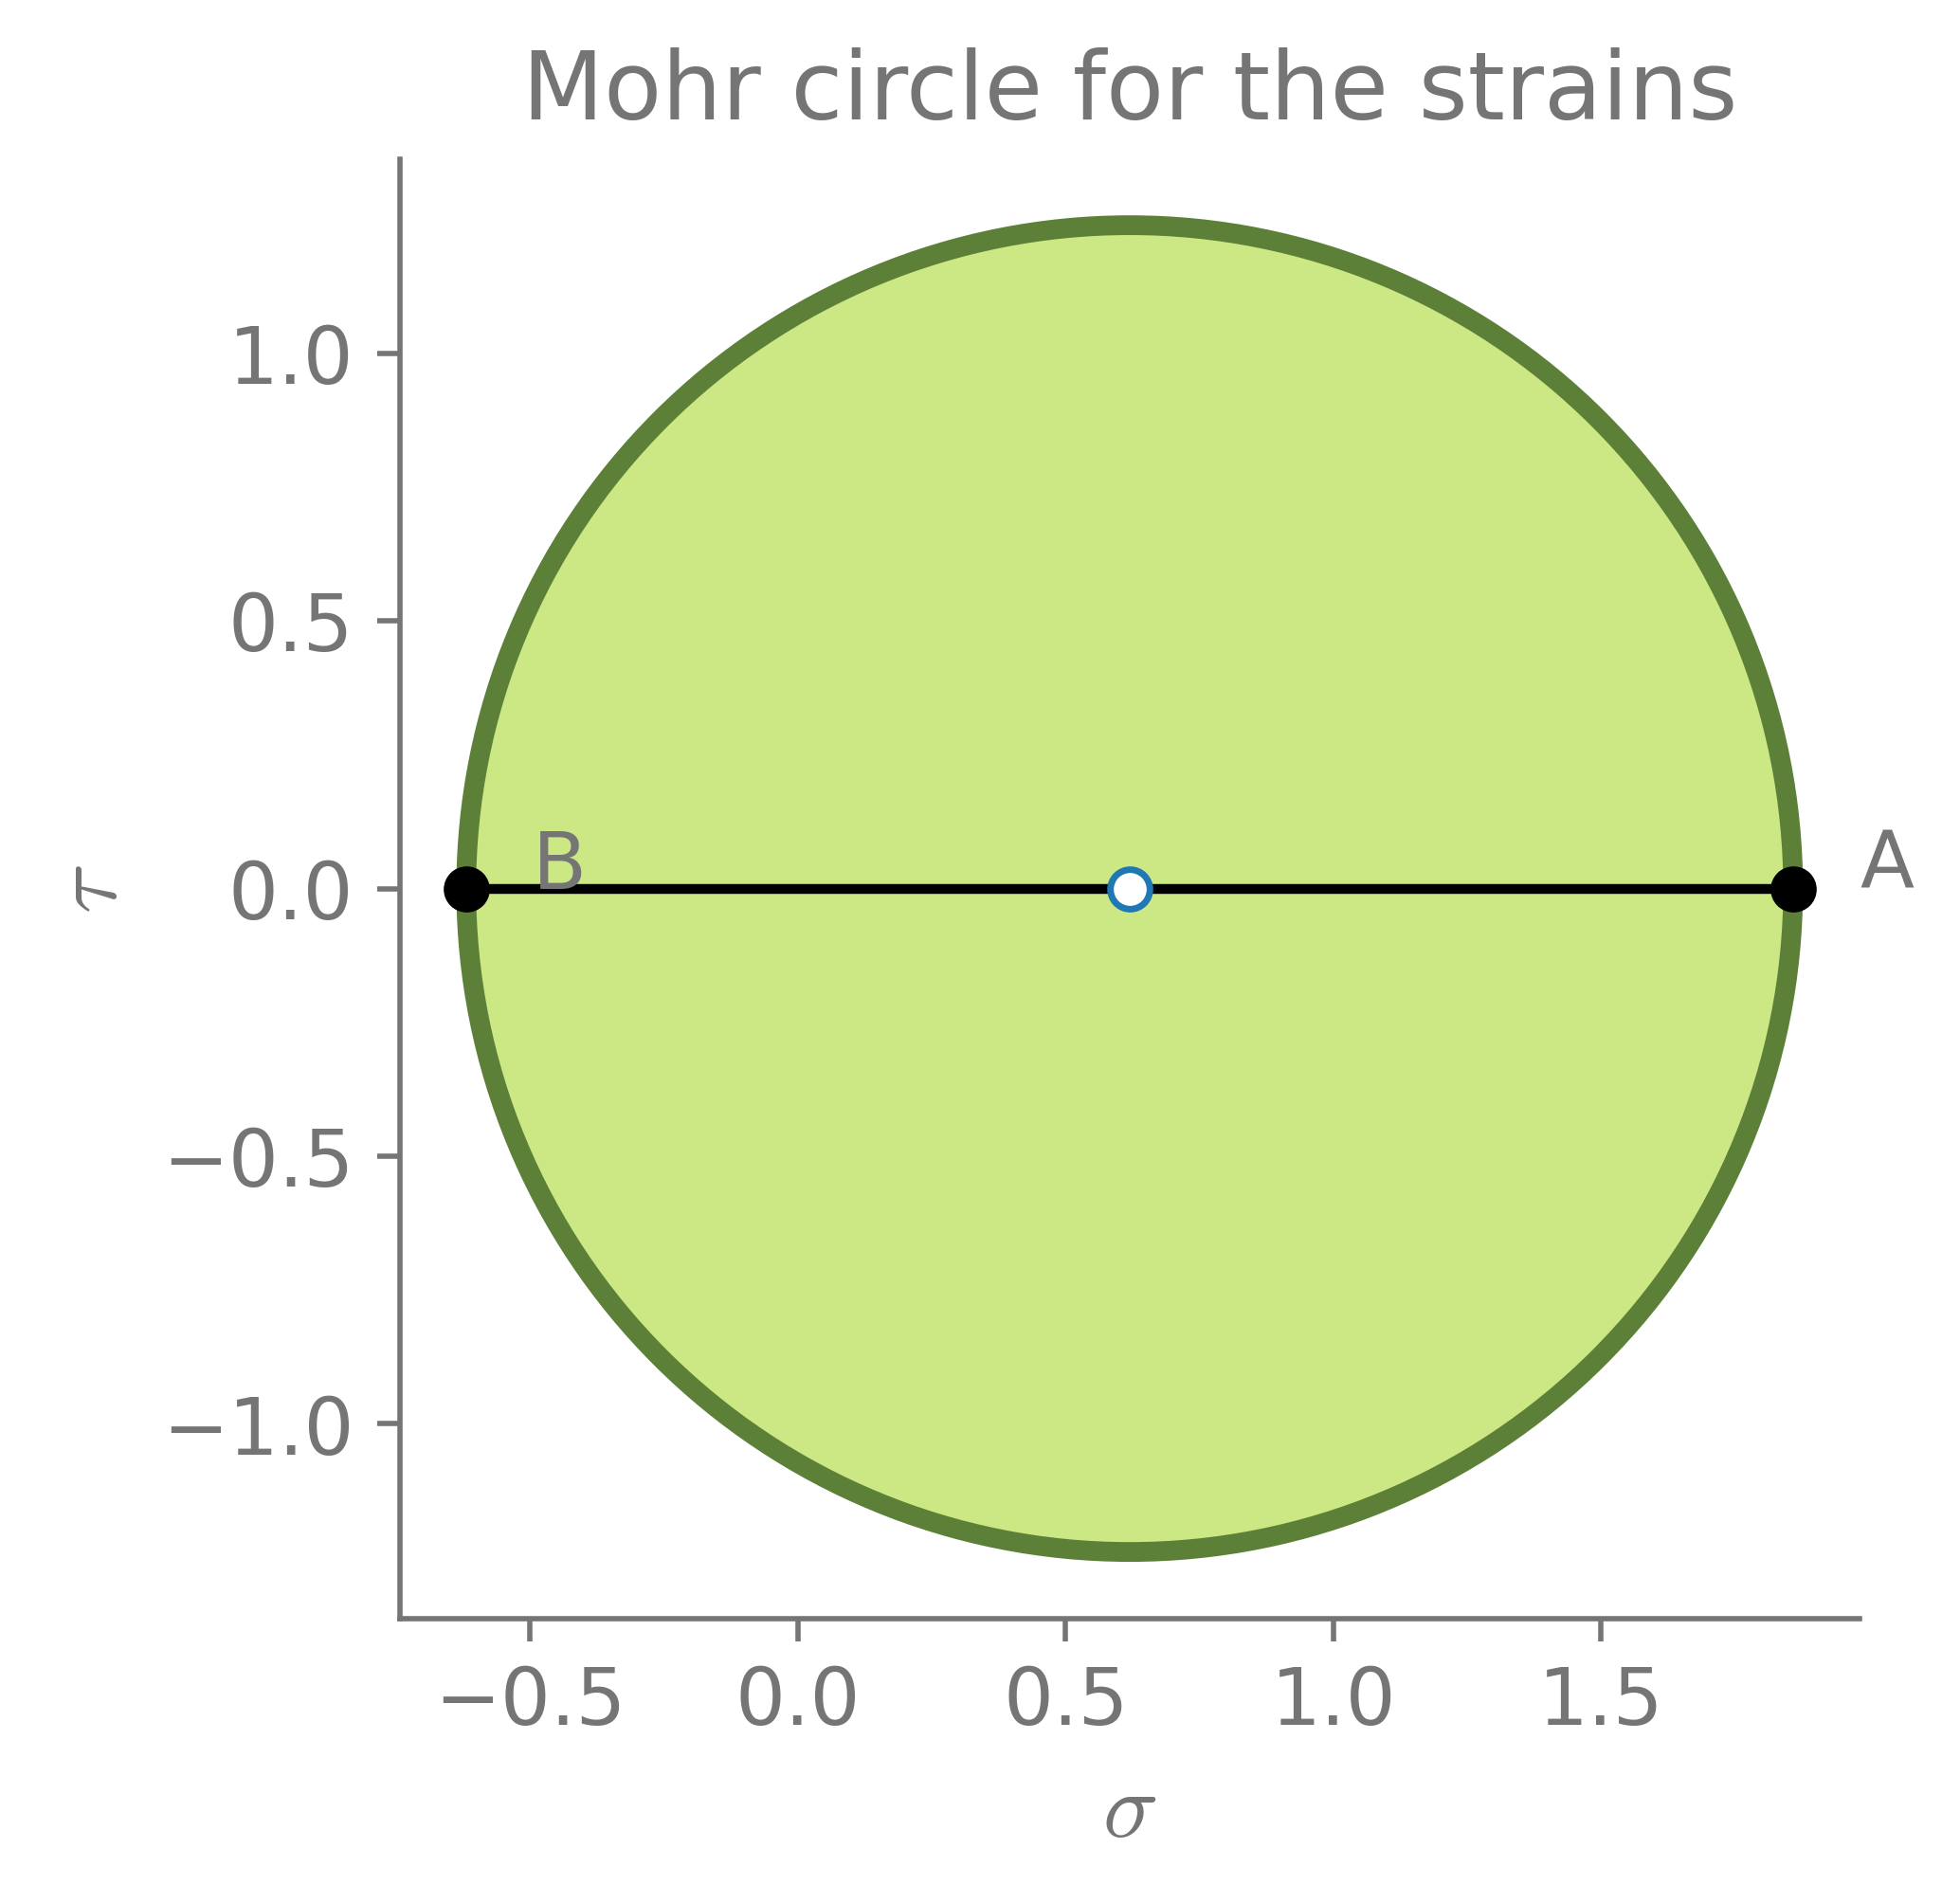

In [440]:
mohr2d(strainmatrix)
plt.title("Mohr circle for the strains")
plt.show()

6. 

In [441]:
L = 80*(10**-3)

# normal strain at point B along BD direction:
M_BD = np.array([-1*L/np.sqrt((L**2)+(L**2)),L/np.sqrt((L**2)+(L**2))])
print(f'The fiber direction M = {M_BD}')

EM_BD = M_BD@strainmatrix@M_BD
print(f'Normal strain on fiber M = {EM_BD:.4f} MPa')

# Deformation = L*strain

D_BD = (L-(L*EM_BD))*(10**3)

print(f'Deformation of fiber M = {D_BD:.4f} mm')

The fiber direction M = [-0.7071  0.7071]
Normal strain on fiber M = 0.6196 MPa
Deformation of fiber M = 30.4314 mm


7. 

In [442]:
# normal strain at point A along AC direction:
N_AC = np.array([L/np.sqrt((L**2)+(L**2)),L/np.sqrt((L**2)+(L**2))])
print(f'The fiber direction N = {N_AC}')

EN_AC = N_AC@strainmatrix@N_AC
print(f'Normal strain on fiber N = {EN_AC:.4f} MPa')

D_AC = (L-(L*EN_AC))*(10**3)

print(f'Deformation of fiber N = {D_AC:.4f} mm')

newangle = np.degrees(2*np.arcsin((0.5*(L+(D_AC*(10**-3))))/L))

print("The change in angle between AB and BC is %3.3f°" % (90-newangle))

The fiber direction N = [0.7071 0.7071]
Normal strain on fiber N = 0.6196 MPa
Deformation of fiber N = 30.4314 mm
The change in angle between AB and BC is 2.709°


8. 

In [443]:
# Derived in part 3

ezznum = ezz.subs({E:Enum,v:vnum,sxx:stressmatrix[0,0],syy:stressmatrix[1,1]})

print("ezz = %3.2f MPa" % (ezznum))

ezz = -0.62 MPa
